# Example Report

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from spiketools.sim import sim_spiketimes
from spiketools.measures.spikes import compute_isis
from spiketools.utils.epoch import epoch_spikes_by_range, epoch_spikes_by_event
from spiketools.plts.spikes import plot_waveform, plot_isis
from spiketools.plts.utils import make_grid, get_grid_subplot
from spiketools.plts.trials import plot_rasters, plot_raster_and_rates
from spiketools.plts.spatial import plot_heatmap, create_heatmap_title
from spiketools.plts.data import plot_text

## Settings

In [3]:
# Spike settings
firing_rate = 4.20
n_seconds = 120

## Simulations

In [4]:
# Simulate an action potential
from neurodsp.sim.transients import sim_action_potential
spike = sim_action_potential(n_seconds=0.02, fs=10000,
                             centers=[0.35, 0.45, 0.6], stds=[0.075, 0.1, 0.15],
                             alphas=[-1, 0, 1], heights=[2.5, -5, 0.25])

In [5]:
# Create example waveforms
n_aps = 250
waveforms = np.ones((n_aps, len(spike)))
for ind in range(n_aps):
    waveforms[ind, :] = spike + np.random.rand(len(spike))

In [6]:
# Simulate spikes
spikes = sim_spiketimes(firing_rate, n_seconds, 'poisson')

## Organize Data

In [7]:
trial_inds = np.arange(10, 120, 10)
trials = epoch_spikes_by_event(spikes, trial_inds, [-5, 5])

In [8]:
events = np.arange(5, 120, 5)
event1s = events[0::2]
event1_spikes = epoch_spikes_by_event(spikes, event1s, [-2.5, 2.5])

event2s = events[1::2]
event2_spikes = epoch_spikes_by_event(spikes, event2s, [-2.5, 2.5])

In [9]:
neuron_string = '\n'.join([
    '# spikes:    {:10d}'.format(1244),
    'firing rate:  {:10.2f} Hz'.format(firing_rate),
    'location:    {}'.format('hippocampus'),
    'channel:    {}'.format('e012'),
])

In [10]:
tbin_size = 0.5
time_range = [-2.5, 2.5]

In [11]:
bins = [6, 6]

In [12]:
place_bins = np.ones(bins) * np.nan

In [13]:
place_bins[0, :] = np.random.rand(bins[1])
place_bins[:, 0] = np.random.rand(bins[1])
place_bins[-1, :] = np.random.rand(bins[1])
place_bins[:, -1] = np.random.rand(bins[1])
place_bins = place_bins * 1.5

## Make Report

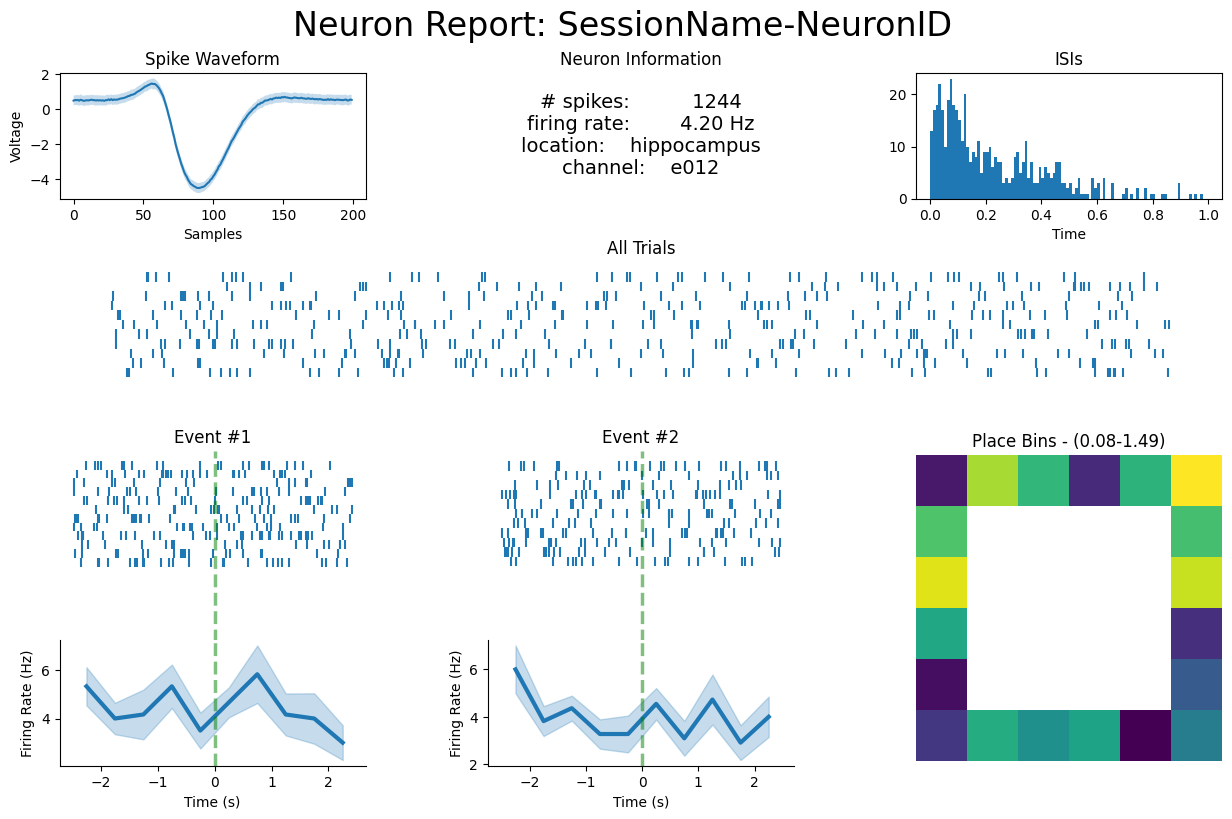

In [14]:
# Initialize figure
grid = make_grid(4, 3, wspace=0.4, hspace=0.5, figsize=(15, 9),
                 title='Neuron Report: {}-{}'.format('SessionName', 'NeuronID'))

# 00: spike waveform
plot_waveform(waveforms, average='mean', shade='std',
              ax=get_grid_subplot(grid, 0, 0))

# 01: unit information
plot_text(neuron_string, title='Neuron Information',
          ax=get_grid_subplot(grid, 0, 1))

# 02: inter-spike intervals
plot_isis(compute_isis(spikes), bins=100, range=(0, 1.0),
          ax=get_grid_subplot(grid, 0, 2))

# 10: raster across all trials
plot_rasters(trials, title='All Trials',
             ax=get_grid_subplot(grid, 1, slice(0, 3)))


# 20/30: raster and associated binned firing rates of event1
ax20 = get_grid_subplot(grid, 2, 0)
ax30 = get_grid_subplot(grid, 3, 0, sharex=ax20)
plot_raster_and_rates(event1_spikes, tbin_size, time_range,
                      title='Event #1', axes=[ax20, ax30])

# 21/31: raster and associated binned firing rates of event2
ax21 = get_grid_subplot(grid, 2, 1)
ax31 = get_grid_subplot(grid, 3, 1, sharex=ax21)
plot_raster_and_rates(event2_spikes, tbin_size, time_range,
                      title='Event #2', axes=[ax21, ax31])

# 22/32: 'place bin' firing
plot_heatmap(place_bins, title=create_heatmap_title('Place Bins', place_bins),
             ax=get_grid_subplot(grid, slice(2, 4), 2))

plt.savefig('report.pdf')